In [31]:
import pydicom as dcm
from tools import *
import matplotlib.pyplot as plt

In [21]:
def get_ROI_slice(z_target,z_list):
    
    slice_num = 0
    slice_nums = []
    for z in z_list:
        if z == z_target:
            slice_nums.append(slice_num)
#             return slice_num
        slice_num +=1
    return slice_nums


In [17]:
path_new = '/data/kayla/anon_images/patients/272/20180503_CT_25_APR_2018/RS.1.2.246.352.221.550032474694837233410476777862273200261.dcm'
path_old = '/data/kayla/anon_images/patients/272_old/20180503_CT_25_APR_2018/RS.1.2.246.352.221.550032474694837233410476777862273200261.dcm'

In [18]:
RS_new = dcm.read_file(path_new)
RS_old = dcm.read_file(path_new)

In [34]:
slices = [dcm.read_file('/data/kayla/anon_images/patients/272/20180503_CT_25_APR_2018/'+ s) for s in os.listdir('/data/kayla/anon_images/patients/272/20180503_CT_25_APR_2018/') if 'CT' in s]
# Order slices
slices.sort(key = lambda x: (x.InstanceNumber))
image = get_pixels_hu(slices)
origin = slices[0].ImagePositionPatient
start_z = origin[2]
start_x = origin[0]
start_y = origin[1]
z_spacing = slices[0].SliceThickness 
pixel_spacing = slices[0].PixelSpacing
spacing = [pixel_spacing[0],pixel_spacing[1],z_spacing]


Intersept: -1000
slope: 1


In [60]:
dict_contours_b, z_lists_b = get_all_ROI_contours(['BODY'], RS_old)
roi_1 = get_ROI_slice(-545, z_lists_b[0])[0]
roi_2 = get_ROI_slice(-545, z_lists_b[0])[1]
roi_x_old1, roi_y_old1= get_ROI_pixel_array(dict_contours_b['BODY'][roi_1],start_x,start_y,pixel_spacing)
roi_x_old2, roi_y_old2= get_ROI_pixel_array(dict_contours_b['BODY'][roi_2],start_x,start_y,pixel_spacing)

dict_contours_b, z_lists_b = get_all_ROI_contours(['BODY'], RS_new)
roi_1 = get_ROI_slice(-545, z_lists_b[0])[0]
roi_2 = get_ROI_slice(-545, z_lists_b[0])[1]
roi_x_new1, roi_y_new1= get_ROI_pixel_array(dict_contours_b['BODY'][roi_1],start_x,start_y,pixel_spacing)
roi_x_new2, roi_y_new2= get_ROI_pixel_array(dict_contours_b['BODY'][roi_2],start_x,start_y,pixel_spacing)

In [61]:
slice_num = int((-545-start_z)/z_spacing)
print(slice_num)

84


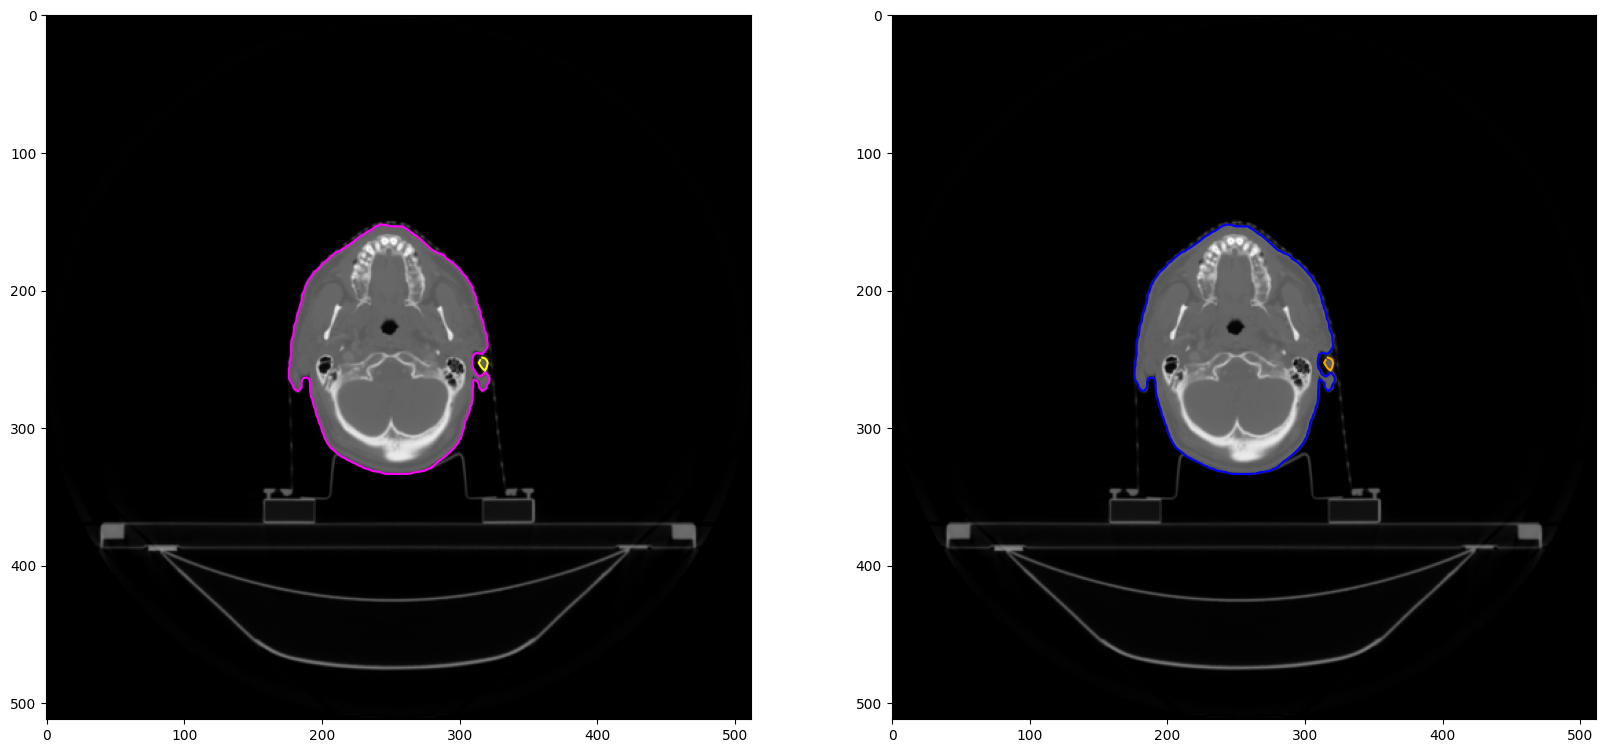

In [62]:

fig = plt.figure(figsize=(20, 10))

fig.add_subplot(1,2,1)
plt.imshow(image[slice_num],cmap='gray')

plt.plot(roi_x_old1,roi_y_old1,'-',color='magenta')
plt.plot(roi_x_old2,roi_y_old2,'-',color='yellow')

fig.add_subplot(1,2,2)
plt.imshow(image[slice_num],cmap='gray')
plt.plot(roi_x_new1,roi_y_new1,'-',color='blue')
plt.plot(roi_x_new2,roi_y_new2,'-',color='orange')